In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import copy

In [5]:
# Option
dave_mc=False

## Code to plot the impact from CO2 and climate separately
# Control - noclimate = Climate impact
# Control - noco2 = CO2 effect

# Open NCSCD as observation
path='/data/jain1/c/sshu3/SBGC/data/NCSCDv2_Circumpolar_netCDF_05deg/ncscdv2_soilc_0.5x0.5.nc'
#path='/data/jain1/c/sshu3/SBGC/data/NCSCDv2_Circumpolar_netCDF_05deg/ncscd_masked_0.5x0.5.nc'
nclu_obs=NetCDFFile(path,'r')
soc_ncscd_orig = nclu_obs.variables['soilc'][:]
latnc2 = nclu_obs.variables['lat'][:]
lonnc2 = nclu_obs.variables['lon'][:]
nclu_obs.close()
soc_ncscd = soc_ncscd_orig[0,:,:]

# Use the NCSCD permafrost mask, which is the norther high latitude permafrost region without greenland
# The mask Mcguire et al., 2016 used including alpine permafrost (Tiebet and the Alps)
# Alpine permafrost to be treated as having a very small amount of SOC, though for the paper we have 
# to consider the whole region.
mask_permafrost = copy.deepcopy(ma.getmask(soc_ncscd))
another_mask = ma.masked_where(soc_ncscd<=0, soc_ncscd)
temp = copy.deepcopy(mask_permafrost[:, 0:360])
mask_permafrost[:, 0:360] = mask_permafrost[:, 360:720]
mask_permafrost[:, 360:720] = temp
temp = copy.deepcopy(another_mask[:, 0:360])
another_mask[:, 0:360] = another_mask[:, 360:720]
another_mask[:, 360:720] = temp
#new_mask = np.logical_or(another_mask, mask_permafrost)

# Path - control
respath='/data/jain1/d/sshu3/SBGC_regional_results/SBGC_1d'
if dave_mc:
    contemp='Global_1DSBGC.bgc-yearly-3d_2009.nc'
    preind='Global_1DSBGC.bgc-yearly-3d_1960.nc'
else:
    contemp='2001_2010'
    preind='1861_1870'
mean_mc='mean_mc'
# future_rcp45='rcp45_2091_2100'
# future_rcp85='rcp85_2091_2100'

# Read the 3D files, For ISAM-1D
# Historical
if dave_mc:
    fp=respath+'/'+preind
else:
    fp=respath+'/mean_bgc3d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soclev_preind = nclu_preind.variables['soil_c_lev'][:]
resplev_preind = nclu_preind.variables['resp_lev'][:]
latnc = nclu_preind.variables['lat'][:]
lonnc = nclu_preind.variables['lon'][:]
#lonnc = ((lonnc - 180) % 360) - 180
nclu_preind.close()

# 20th century
if dave_mc:
    fp=respath+'/'+contemp
else:
    fp=respath+'/mean_bgc3d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soclev_contemp = nclu_contemp.variables['soil_c_lev'][:]
resplev_contemp = nclu_contemp.variables['resp_lev'][:]
nclu_contemp.close()

# Path - noclimate
respath='/data/jain1/d/sshu3/SBGC_regional_results/SBGC_1d_noclim'
if dave_mc:
    contemp='Global_1DSBGC.bgc-yearly-3d_2009.nc'
    preind='Global_1DSBGC.bgc-yearly-3d_1960.nc'
else:
    contemp='2001_2010'
    preind='1861_1870'
mean_mc='mean_mc'
# future_rcp45='rcp45_2091_2100'
# future_rcp85='rcp85_2091_2100'

# Read the 3D files, For ISAM-1D
# Historical
if dave_mc:
    fp=respath+'/'+preind
else:
    fp=respath+'/mean_bgc3d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soclev_preind_noclim = nclu_preind.variables['soil_c_lev'][:]
resplev_preind_noclim = nclu_preind.variables['resp_lev'][:]
#lonnc = ((lonnc - 180) % 360) - 180
nclu_preind.close()

# 20th century
if dave_mc:
    fp=respath+'/'+contemp
else:
    fp=respath+'/mean_bgc3d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soclev_contemp_noclim = nclu_contemp.variables['soil_c_lev'][:]
resplev_contemp_noclim = nclu_contemp.variables['resp_lev'][:]
nclu_contemp.close()

# Path - noco2
respath='/data/jain1/d/sshu3/SBGC_regional_results/SBGC_1d_noco2'
if dave_mc:
    contemp='Global_1DSBGC.bgc-yearly-3d_2009.nc'
    preind='Global_1DSBGC.bgc-yearly-3d_1960.nc'
else:
    contemp='2001_2010'
    preind='1861_1870'
mean_mc='mean_mc'
# future_rcp45='rcp45_2091_2100'
# future_rcp85='rcp85_2091_2100'

# Read the 3D files, For ISAM-1D
# Historical
if dave_mc:
    fp=respath+'/'+preind
else:
    fp=respath+'/mean_bgc3d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soclev_preind_noco2 = nclu_preind.variables['soil_c_lev'][:]
resplev_preind_noco2 = nclu_preind.variables['resp_lev'][:]
latnc = nclu_preind.variables['lat'][:]
lonnc = nclu_preind.variables['lon'][:]
#lonnc = ((lonnc - 180) % 360) - 180
nclu_preind.close()

# 20th century
if dave_mc:
    fp=respath+'/'+contemp
else:
    fp=respath+'/mean_bgc3d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soclev_contemp_noco2 = nclu_contemp.variables['soil_c_lev'][:]
resplev_contemp_noco2 = nclu_contemp.variables['resp_lev'][:]
nclu_contemp.close()

# Read the 3D files, For ISAM-0D
# Also need to plot the ISAM-0D SOC results and NCSCD data to the right side 
# and compare against the mndel outputs
# Seems like the respiration output from 1D model has some problem
# Now let's check the 2D output

# Path - control
respath='/data/jain1/d/sshu3/SBGC_regional_results/SBGC_0d'
if dave_mc:
    contemp='Global_0DSBGC.bgc-yearly-2d_2009.nc'
    preind='Global_0DSBGC.bgc-yearly-2d_1960.nc'
else:
    contemp='2001_2010'
    preind='1861_1870'
mean_mc='mean_mc'
# future_rcp45='rcp45_2091_2100'
# future_rcp85='rcp85_2091_2100'
# Read the 2D files, For ISAM-0D
# Historical
if dave_mc:
    fp=respath+'/'+preind
else:
    fp=respath+'/mean_bgc2d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soc0d_preind = nclu_preind.variables['soil_c'][:]
resp0d_preind = nclu_preind.variables['resp'][:]
#lonnc = ((lonnc - 180) % 360) - 180
nclu_preind.close()

# 20th century
if dave_mc:
    fp=respath+'/'+contemp
else:
    fp=respath+'/mean_bgc2d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soc0d_contemp = nclu_contemp.variables['soil_c'][:]
resp0d_contemp = nclu_contemp.variables['resp'][:]
nclu_contemp.close()

# Path - noclimate
respath='/data/jain1/d/sshu3/SBGC_regional_results/SBGC_0d_noclim'
if dave_mc:
    contemp='Global_0DSBGC.bgc-yearly-2d_2009.nc'
    preind='Global_0DSBGC.bgc-yearly-2d_1960.nc'
else:
    contemp='2001_2010'
    preind='1861_1870'
mean_mc='mean_mc'
# future_rcp45='rcp45_2091_2100'
# future_rcp85='rcp85_2091_2100'
# Read the 2D files, For ISAM-0D
# Historical
if dave_mc:
    fp=respath+'/'+preind
else:
    fp=respath+'/mean_bgc2d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soc0d_preind_noclim = nclu_preind.variables['soil_c'][:]
resp0d_preind_noclim = nclu_preind.variables['resp'][:]
#lonnc = ((lonnc - 180) % 360) - 180
nclu_preind.close()

# 20th century
if dave_mc:
    fp=respath+'/'+contemp
else:
    fp=respath+'/mean_bgc2d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soc0d_contemp_noclim = nclu_contemp.variables['soil_c'][:]
resp0d_contemp_noclim = nclu_contemp.variables['resp'][:]
nclu_contemp.close()

# Path - noco2
respath='/data/jain1/d/sshu3/SBGC_regional_results/SBGC_0d_noco2'
if dave_mc:
    contemp='Global_0DSBGC.bgc-yearly-2d_2009.nc'
    preind='Global_0DSBGC.bgc-yearly-2d_1960.nc'
else:
    contemp='2001_2010'
    preind='1861_1870'
mean_mc='mean_mc'
# future_rcp45='rcp45_2091_2100'
# future_rcp85='rcp85_2091_2100'
# Read the 2D files, For ISAM-0D
# Historical
if dave_mc:
    fp=respath+'/'+preind
else:
    fp=respath+'/mean_bgc2d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soc0d_preind_noco2 = nclu_preind.variables['soil_c'][:]
resp0d_preind_noco2 = nclu_preind.variables['resp'][:]
#lonnc = ((lonnc - 180) % 360) - 180
nclu_preind.close()

# 20th century
if dave_mc:
    fp=respath+'/'+contemp
else:
    fp=respath+'/mean_bgc2d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soc0d_contemp_noco2 = nclu_contemp.variables['soil_c'][:]
resp0d_contemp_noco2 = nclu_contemp.variables['resp'][:]
nclu_contemp.close()

# # 21th century - RCP45
# fp=respath+future_rcp45+'/mean_bgc2d_'+future_rcp45+'.nc'
# nclu_rcp45=NetCDFFile(fp,'r')
# soc0d_rcp45 = nclu_rcp45.variables['soil_c'][:]
# resp0d_rcp45 = nclu_rcp45.variables['resp'][:]
# nclu_rcp45.close()

# # 21th century - RCP85
# fp=respath+future_rcp85+'/mean_bgc2d_'+future_rcp85+'.nc'
# nclu_rcp85=NetCDFFile(fp,'r')
# soc0d_rcp85 = nclu_rcp85.variables['soil_c'][:]
# resp0d_rcp85 = nclu_rcp85.variables['resp'][:]
# nclu_rcp85.close()

#temp = soc_ncscd[:, 0:359]
#soc_ncscd[:, 0:359] = soc_ncscd[:, 360:719]
#soc_ncscd[:, 360:719] = temp[:,0:359]
#soc_ncscd[soc0d_contemp<0] = float("nan")

# Open the histel and histosol fraction map to mask peatland 
respath = '/data/jain1/c/sshu3/SBGC/data/NCSCDv2_Circumpolar_netCDF_05deg/'
fhistosol = 'NCSCDv2_Circumpolar_WGS84_histosol_pct_05deg.nc'
fhistel = 'NCSCDv2_Circumpolar_WGS84_histel_pct_05deg.nc'

fp=respath+fhistosol
nclu_his=NetCDFFile(fp,'r')
histosol = nclu_his.variables['NCSCDv2'][:]
latnc3 = nclu_his.variables['lat'][:]
lonnc3 = nclu_his.variables['lon'][:]
frac_histosol = copy.deepcopy(histosol)
histosol[histosol<=0] = 0
histosol[histosol>0] = 1
nclu_his.close()
#histosol = np.flipud(histosol)

fp=respath+fhistel
nclu_his=NetCDFFile(fp,'r')
histel = nclu_his.variables['NCSCDv2'][:]
frac_histel = copy.deepcopy(histel)
histel[histel<=0] = 0
histel[histel>0] = 1
nclu_his.close()

frac_peat = frac_histosol/100. + frac_histel/100.

# Add a new mask with considering peat fraction and non-permafrost region
histel_full = ma.zeros((360,720))
histel_full[0:111,:] = histel
temp = copy.deepcopy(histel_full[:, 0:360])
histel_full[:, 0:360] = histel_full[:, 360:720]
histel_full[:, 360:720] = temp
histel_full = histel_full[::-1,:]
nopeat_mask = ma.masked_where(histel_full>0, another_mask)

# Get the topsoil SOC (0-30cm) from 1D model
soc_top_preind = np.sum(soclev_preind[0:5,:,:], 0)
soc_top_contemp = np.sum(soclev_contemp[0:5,:,:], 0)
soc_top_preind_noclim = np.sum(soclev_preind_noclim[0:5,:,:], 0)
soc_top_contemp_noclim = np.sum(soclev_contemp_noclim[0:5,:,:], 0)
soc_top_preind_noco2 = np.sum(soclev_preind_noco2[0:5,:,:], 0)
soc_top_contemp_noco2 = np.sum(soclev_contemp_noco2[0:5,:,:], 0)
# soc_top_rcp45 = np.sum(soclev_rcp45[0:5,:,:], 0)
# soc_top_rcp85 = np.sum(soclev_rcp85[0:5,:,:], 0)
# topsoil resp
resp_top_preind = np.sum(resplev_preind[0:5,:,:], 0)
resp_top_contemp = np.sum(resplev_contemp[0:5,:,:], 0)
# resp_top_rcp45 = np.sum(resplev_rcp45[0:5,:,:], 0)
# resp_top_rcp85 = np.sum(resplev_rcp85[0:5,:,:], 0)

# Get the subsoil SOC (30-100cm) from 1D model
soc_sub_preind = np.sum(soclev_preind[5:7,:,:], 0)+0.3*soclev_preind[7,:,:]
soc_sub_contemp = np.sum(soclev_contemp[5:7,:,:], 0)+0.3*soclev_contemp[7,:,:]
soc_sub_preind_noclim = np.sum(soclev_preind_noclim[5:7,:,:], 0)+0.3*soclev_preind_noclim[7,:,:]
soc_sub_contemp_noclim = np.sum(soclev_contemp_noclim[5:7,:,:], 0)+0.3*soclev_contemp_noclim[7,:,:]
soc_sub_preind_noco2 = np.sum(soclev_preind_noco2[5:7,:,:], 0)+0.3*soclev_preind_noco2[7,:,:]
soc_sub_contemp_noco2 = np.sum(soclev_contemp_noco2[5:7,:,:], 0)+0.3*soclev_contemp_noco2[7,:,:]
# soc_sub_rcp45 = np.sum(soclev_rcp45[5:7,:,:], 0)+0.3*soclev_rcp45[7,:,:]
# soc_sub_rcp85 = np.sum(soclev_rcp85[5:7,:,:], 0)+0.3*soclev_rcp85[7,:,:]

# subsoil resp
resp_sub_preind = np.sum(resplev_preind[5:7,:,:], 0)+0.3*resplev_preind[7,:,:]
resp_sub_contemp = np.sum(resplev_contemp[5:7,:,:], 0)+0.3*resplev_contemp[7,:,:]
# resp_sub_rcp45 = np.sum(resplev_rcp45[5:7,:,:], 0)+0.3*resplev_rcp45[7,:,:]
# resp_sub_rcp85 = np.sum(resplev_rcp85[5:7,:,:], 0)+0.3*resplev_rcp85[7,:,:]

# Get the first 1m SOC
# 1D
soc_preind = soc_top_preind + soc_sub_preind
soc_contemp = soc_top_contemp + soc_sub_contemp
soc_preind_noclim = soc_top_preind_noclim + soc_sub_preind_noclim
soc_contemp_noclim = soc_top_contemp_noclim + soc_sub_contemp_noclim
soc_preind_noco2 = soc_top_preind_noco2 + soc_sub_preind_noco2
soc_contemp_noco2 = soc_top_contemp_noco2 + soc_sub_contemp_noco2
# soc_rcp45 = soc_top_rcp45 + soc_sub_rcp45
# soc_rcp85 = soc_top_rcp85 + soc_sub_rcp85

dsoc = soc_contemp - soc_preind
dsoc_topsoil = soc_top_contemp - soc_top_preind
dsoc_subsoil = soc_sub_contemp - soc_sub_preind
dsoc_noclim = soc_contemp_noclim - soc_preind_noclim
dsoc_topsoil_noclim = soc_top_contemp_noclim - soc_top_preind_noclim
dsoc_subsoil_noclim = soc_sub_contemp_noclim - soc_sub_preind_noclim
dsoc_noco2 = soc_contemp_noco2 - soc_preind_noco2
dsoc_topsoil_noco2 = soc_top_contemp_noco2 - soc_top_preind_noco2
dsoc_subsoil_noco2 = soc_sub_contemp_noco2 - soc_sub_preind_noco2

# dsoc_rcp45 = soc_rcp45 - soc_contemp
# dsoc_topsoil_rcp45 = soc_top_rcp45 - soc_top_contemp
# dsoc_subsoil_rcp45 = soc_sub_rcp45 - soc_sub_contemp

# dsoc_rcp85 = soc_rcp85 - soc_contemp
# dsoc_topsoil_rcp85 = soc_top_rcp85 - soc_top_contemp
# dsoc_subsoil_rcp85 = soc_sub_rcp85 - soc_sub_contemp

# 0D
dsoc0d = soc0d_contemp - soc0d_preind
dsoc0d_noclim = soc0d_contemp_noclim - soc0d_preind_noclim
dsoc0d_noco2 = soc0d_contemp_noco2 - soc0d_preind_noco2

dsoc0d_topsoil = 0.3*(soc0d_contemp - soc0d_preind)
dsoc0d_topsoil_noclim = 0.3*(soc0d_contemp_noclim - soc0d_preind_noclim)
dsoc0d_topsoil_noco2 = 0.3*(soc0d_contemp_noco2 - soc0d_preind_noco2)

dsoc0d_subsoil = 0.7*(soc0d_contemp - soc0d_preind)
dsoc0d_subsoil_noclim = 0.7*(soc0d_contemp_noclim - soc0d_preind_noclim)
dsoc0d_subsoil_noco2 = 0.7*(soc0d_contemp_noco2 - soc0d_preind_noco2)

# dsoc0d_rcp45 = soc0d_rcp45 - soc0d_contemp
# dsoc0d_rcp85 = soc0d_rcp85 - soc0d_contemp

# resp
# 1D
resp_preind = resp_top_preind + resp_sub_preind
resp_contemp = resp_top_contemp + resp_sub_contemp
# resp_rcp45 = resp_top_rcp45 + resp_sub_rcp45
# resp_rcp85 = resp_top_rcp85 + resp_sub_rcp85

dresp = resp_contemp - resp_preind
# dresp_rcp45 = resp_rcp45 - resp_contemp
# dresp_rcp85 = resp_rcp85 - resp_contemp

# 0D
dresp0d = resp0d_contemp - resp0d_preind
# dresp0d_rcp45 = resp0d_rcp45 - resp0d_contemp
# dresp0d_rcp85 = resp0d_rcp85 - resp0d_contemp

## Need to check the turnover time later.
## No necessary for right now.

# Get the bulk soil turnover time by calculating the turnover at each layer then calculate C weighted average.
# Get the turnover for each layer
soclev_preind_cp = copy.deepcopy(soclev_preind)
soclev_contemp_cp = copy.deepcopy(soclev_contemp)
# soclev_rcp45_cp = copy.deepcopy(soclev_rcp45)
# soclev_rcp85_cp = copy.deepcopy(soclev_rcp85)

tau_lev_preind = soclev_preind/resplev_preind
tau_lev_contemp = soclev_contemp/resplev_contemp
# tau_lev_rcp45 = soclev_rcp45/resplev_rcp45
# tau_lev_rcp85 = soclev_rcp85/resplev_rcp85

# Anomalous high SOC but low respiration will be ignored.
tau_lev_preind[tau_lev_preind>4000] = 0
tau_lev_contemp[tau_lev_contemp>4000] = 0
# tau_lev_rcp45[tau_lev_rcp45>4000] = 0
# tau_lev_rcp85[tau_lev_rcp85>4000] = 0
soclev_preind_cp[tau_lev_preind<=0] = 0.
soclev_contemp_cp[tau_lev_contemp<=0] = 0.
# soclev_rcp45_cp[tau_lev_rcp45<=0] = 0.
# soclev_rcp85_cp[tau_lev_rcp85<=0] = 0.
soc_preind_cp = np.sum(soclev_preind_cp[0:7,:,:], 0)+0.3*soclev_preind_cp[7,:,:]
soc_contemp_cp = np.sum(soclev_contemp_cp[0:7,:,:], 0)+0.3*soclev_contemp_cp[7,:,:]
# soc_rcp45_cp = np.sum(soclev_rcp45_cp[0:7,:,:], 0)+0.3*soclev_rcp45_cp[7,:,:]
# soc_rcp85_cp = np.sum(soclev_rcp85_cp[0:7,:,:], 0)+0.3*soclev_rcp85_cp[7,:,:]

# Calculate the C mass weights
wt_preind = soclev_preind_cp/soc_preind_cp
wt_contemp = soclev_contemp_cp/soc_contemp_cp
# wt_rcp45 = soclev_rcp45_cp/soc_rcp45_cp
# wt_rcp85 = soclev_rcp85_cp/soc_rcp85_cp

tau_tmp_preind = wt_preind * tau_lev_preind
tau_tmp_contemp = wt_contemp * tau_lev_contemp
# tau_tmp_rcp45 = wt_rcp45 * tau_lev_rcp45
# tau_tmp_rcp85 = wt_rcp85 * tau_lev_rcp85

tau_preind = np.sum(tau_tmp_preind[0:7,:,:], 0)+0.3*tau_tmp_preind[7,:,:]
tau_contemp = np.sum(tau_tmp_contemp[0:7,:,:], 0)+0.3*tau_tmp_contemp[7,:,:]
# tau_rcp45 = np.sum(tau_tmp_rcp45[0:7,:,:], 0)+0.3*tau_tmp_rcp45[7,:,:]
# tau_rcp85 = np.sum(tau_tmp_rcp85[0:7,:,:], 0)+0.3*tau_tmp_rcp85[7,:,:]

dtau = tau_contemp - tau_preind
# dtau_rcp45 = tau_rcp45 - tau_contemp
# dtau_rcp85 = tau_rcp85 - tau_contemp

# 0D
tau0d_preind = soc0d_preind/resp0d_preind
tau0d_contemp = soc0d_contemp/resp0d_contemp
# tau0d_rcp45 = soc0d_rcp45/resp0d_rcp45
# tau0d_rcp85 = soc0d_rcp45/resp0d_rcp85

dtau0d = tau0d_contemp - tau0d_preind
# dtau0d_rcp45 = tau0d_rcp45 - tau0d_contemp
# dtau0d_rcp85 = tau0d_rcp85 - tau0d_contemp

In [ ]:
plt.imshow(another_mask)

In [6]:
# Calculate total numbers for paper
# Mask all regions outside the northern permafrost extent
tau_contemp_perm = copy.deepcopy(tau_contemp)
tau_contemp_perm.mask = another_mask.mask
tau0d_contemp_perm = copy.deepcopy(tau0d_contemp)
tau0d_contemp_perm.mask = another_mask.mask

# Control
soc_top_preind_perm = copy.deepcopy(soc_top_preind)
soc_top_preind_perm.mask = another_mask.mask
soc_top_contemp_perm = copy.deepcopy(soc_top_contemp)
soc_top_contemp_perm.mask = another_mask.mask
soc_sub_preind_perm = copy.deepcopy(soc_sub_preind)
soc_sub_preind_perm.mask = another_mask.mask
soc_sub_contemp_perm = copy.deepcopy(soc_sub_contemp)
soc_sub_contemp_perm.mask = another_mask.mask

soc_preind_perm = copy.deepcopy(soc_preind)
soc_preind_perm.mask = another_mask.mask
soc0d_preind_perm = copy.deepcopy(soc0d_preind)
soc0d_preind_perm.mask = another_mask.mask
soc_contemp_perm = copy.deepcopy(soc_contemp)
soc_contemp_perm.mask = another_mask.mask
soc0d_contemp_perm = copy.deepcopy(soc0d_contemp)
soc0d_contemp_perm.mask = another_mask.mask

# No Climate
soc_top_preind_noclim_perm = copy.deepcopy(soc_top_preind_noclim)
soc_top_preind_noclim_perm.mask = another_mask.mask
soc_top_contemp_noclim_perm = copy.deepcopy(soc_top_contemp_noclim)
soc_top_contemp_noclim_perm.mask = another_mask.mask
soc_sub_preind_noclim_perm = copy.deepcopy(soc_sub_preind_noclim)
soc_sub_preind_noclim_perm.mask = another_mask.mask
soc_sub_contemp_noclim_perm = copy.deepcopy(soc_sub_contemp_noclim)
soc_sub_contemp_noclim_perm.mask = another_mask.mask

soc_preind_noclim_perm = copy.deepcopy(soc_preind_noclim)
soc_preind_noclim_perm.mask = another_mask.mask
soc0d_preind_noclim_perm = copy.deepcopy(soc0d_preind_noclim)
soc0d_preind_noclim_perm.mask = another_mask.mask
soc_contemp_noclim_perm = copy.deepcopy(soc_contemp_noclim)
soc_contemp_noclim_perm.mask = another_mask.mask
soc0d_contemp_noclim_perm = copy.deepcopy(soc0d_contemp_noclim)
soc0d_contemp_noclim_perm.mask = another_mask.mask

# No CO2
soc_top_preind_noco2_perm = copy.deepcopy(soc_top_preind_noco2)
soc_top_preind_noco2_perm.mask = another_mask.mask
soc_top_contemp_noco2_perm = copy.deepcopy(soc_top_contemp_noco2)
soc_top_contemp_noco2_perm.mask = another_mask.mask
soc_sub_preind_noco2_perm = copy.deepcopy(soc_sub_preind_noco2)
soc_sub_preind_noco2_perm.mask = another_mask.mask
soc_sub_contemp_noco2_perm = copy.deepcopy(soc_sub_contemp_noco2)
soc_sub_contemp_noco2_perm.mask = another_mask.mask

soc_preind_noco2_perm = copy.deepcopy(soc_preind_noco2)
soc_preind_noco2_perm.mask = another_mask.mask
soc0d_preind_noco2_perm = copy.deepcopy(soc0d_preind_noco2)
soc0d_preind_noco2_perm.mask = another_mask.mask
soc_contemp_noco2_perm = copy.deepcopy(soc_contemp_noco2)
soc_contemp_noco2_perm.mask = another_mask.mask
soc0d_contemp_noco2_perm = copy.deepcopy(soc0d_contemp_noco2)
soc0d_contemp_noco2_perm.mask = another_mask.mask

# NCSCD
soc_ncscd_perm = copy.deepcopy(soc_ncscd)
nopeat_mask_new = copy.deepcopy(nopeat_mask)
temp = copy.deepcopy(nopeat_mask_new[:,0:360])
nopeat_mask_new[:,0:360] = nopeat_mask_new[:,360:720]
nopeat_mask_new[:,360:720] = temp
soc_ncscd_perm.mask = nopeat_mask_new.mask

# Get the grid area
nlon = 720
nlat = 360
grid_area = np.ones((nlat, nlon))*-9999.
val = np.ones((nlat, nlon))*float("nan")
val_0d = np.ones((nlat, nlon))*float("nan")
val_obs = np.ones((nlat, nlon))*float("nan")
earth_area =  5.096e14;
lat = np.arange(-89.75, 90.25, 0.5)
res = 0.5;
for i in np.arange(0,nlat):
    for j in np.arange(0,nlon):
        grid_area[i,j] = (earth_area/2)*abs(np.sin((lat[i] - res/2)*np.pi/180) -
                    np.sin((lat[i] + res/2)*np.pi/180))/(360/res)
        # ISAM-1D estimation for 2000s
        val[i,j] = soc_contemp_noco2_perm[i,j] * grid_area[i,j]
        # ISAM-0D estimation for 2000s
        val_0d[i,j] = soc0d_contemp_noco2_perm[i,j] * grid_area[i,j]
        # NCSCD_v2
        val_obs[i,j] = soc_ncscd[i,j] * grid_area[i,j]
        

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:88: UserWarning: Warning: converting a masked element to nan.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: UserWarning: Warning: converting a masked element to nan.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:92: UserWarning: Warning: converting a masked element to nan.


In [ ]:
# Get the total amount of NCSCD SOC by excluding histosol and histel
total_histosol = 69.1
total_histel = 49.3
val_0d[val_0d<0] = 0
isam_0d_all = np.nansum(val_0d)/1e12
isam_1d_all = np.nansum(val)/1e12
ncscd_all = np.nansum(val_obs)/1e12
ncscd_nopeat = np.nansum(val_obs)/1e12 - total_histosol - total_histel
print('NCSCD SOC stock ...')
print(ncscd_all)
print('NCSCD SOC stock without peat ...')
print(ncscd_nopeat)
print('ISAM-1D estimated SOC stock ...')
print(isam_1d_all)
print('ISAM-0D estimated SOC stock ...')
print(isam_0d_all)

In [ ]:
# ISAM-1D control 2000s ...
# 353.52246987372865
# ISAM-1D noclim 2000s ...
# 353.54943063669714
# ISAM-1D noco2 2000s ...
# 344.8873073819888
# ISAM-1D 1860s ...
# 343.61655160412346

# ISAM-0D control 2000s ...
# 180.7218003115083
# ISAM-0D noclim 2000s ...
# 183.71581733148145
# ISAM-0D noco2 2000s ...
# 173.77598900823125
# ISAM-0D control 1860s ...
# 177.30753527613672

In [ ]:
# Clim-1D: -1.0
# CO2-1D: 10.9
# Clim-1D: -3.6
# CO2-1D: 6.6

In [ ]:
soc_contemp_perm = copy.deepcopy(soc_contemp)

In [ ]:
plt.imshow(dsoc)

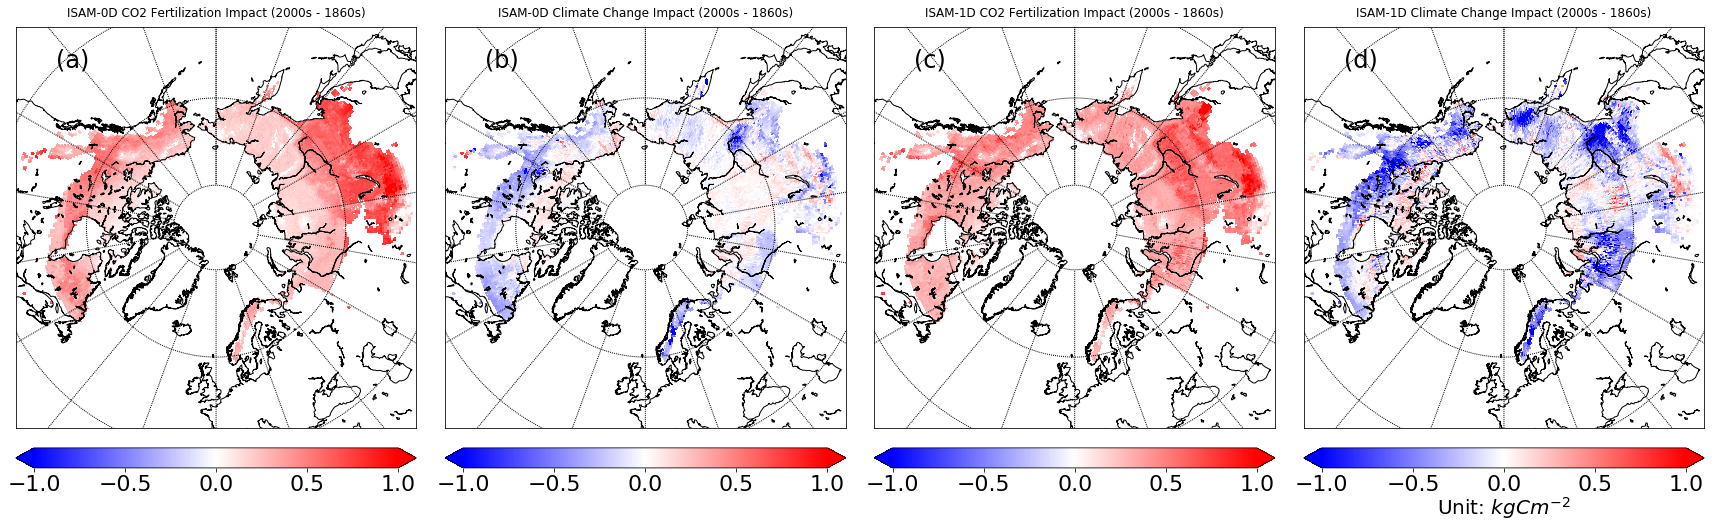

In [8]:
# Mask all regions outside the northern permafrost extent
# Control
dsoc_perm = copy.deepcopy(dsoc)
dsoc_perm.mask = another_mask.mask
dsoc0d_perm = copy.deepcopy(dsoc0d)
dsoc0d_perm.mask = another_mask.mask
# No Climate
dsoc_noclim_perm = copy.deepcopy(dsoc_noclim)
dsoc_noclim_perm.mask = another_mask.mask
dsoc0d_noclim_perm = copy.deepcopy(dsoc0d_noclim)
dsoc0d_noclim_perm.mask = another_mask.mask
# No CO2
dsoc_noco2_perm = copy.deepcopy(dsoc_noco2)
dsoc_noco2_perm.mask = another_mask.mask
dsoc0d_noco2_perm = copy.deepcopy(dsoc0d_noco2)
dsoc0d_noco2_perm.mask = another_mask.mask

# Topsoil
# Control
dsoc_top_perm = copy.deepcopy(dsoc_topsoil)
dsoc_top_perm.mask = another_mask.mask
dsoc0d_top_perm = copy.deepcopy(dsoc0d_topsoil)
dsoc0d_top_perm.mask = another_mask.mask
# No Climate
dsoc_top_noclim_perm = copy.deepcopy(dsoc_topsoil_noclim)
dsoc_top_noclim_perm.mask = another_mask.mask
dsoc0d_top_noclim_perm = copy.deepcopy(dsoc0d_topsoil_noclim)
dsoc0d_top_noclim_perm.mask = another_mask.mask
# No CO2
dsoc_top_noco2_perm = copy.deepcopy(dsoc_topsoil_noco2)
dsoc_top_noco2_perm.mask = another_mask.mask
dsoc0d_top_noco2_perm = copy.deepcopy(dsoc0d_topsoil_noco2)
dsoc0d_top_noco2_perm.mask = another_mask.mask

# Subsoil
# Control
dsoc_sub_perm = copy.deepcopy(dsoc_subsoil)
dsoc_sub_perm.mask = another_mask.mask
dsoc0d_sub_perm = copy.deepcopy(dsoc0d_subsoil)
dsoc0d_sub_perm.mask = another_mask.mask
# No Climate
dsoc_sub_noclim_perm = copy.deepcopy(dsoc_subsoil_noclim)
dsoc_sub_noclim_perm.mask = another_mask.mask
dsoc0d_sub_noclim_perm = copy.deepcopy(dsoc0d_subsoil_noclim)
dsoc0d_sub_noclim_perm.mask = another_mask.mask
# No CO2
dsoc_sub_noco2_perm = copy.deepcopy(dsoc_subsoil_noco2)
dsoc_sub_noco2_perm.mask = another_mask.mask
dsoc0d_sub_noco2_perm = copy.deepcopy(dsoc0d_subsoil_noco2)
dsoc0d_sub_noco2_perm.mask = another_mask.mask

## Get into the story of tau later
# dtau_perm = copy.deepcopy(dtau)
# dtau_perm.mask = another_mask.mask
# dtau0d_perm = copy.deepcopy(dtau0d)
# dtau0d_perm.mask = another_mask.mask

# Plot the figure 10a
# Total 1m soil
fig = plt.figure(figsize=(24,10))

ax1 = fig.add_subplot(141)
ax1.set_title("ISAM-0D CO2 Fertilization Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,dsoc0d_perm[:,:] - dsoc0d_noco2_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
cbar = map.colorbar(cs1,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(a)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax2 = fig.add_subplot(142)
ax2.set_title("ISAM-0D Climate Change Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs2 = map.pcolormesh(x,y,dsoc0d_perm[:,:] - dsoc0d_noclim_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs2,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(b)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax3 = fig.add_subplot(143)
ax3.set_title("ISAM-1D CO2 Fertilization Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs3 = map.pcolormesh(x,y, dsoc_perm[:,:] - dsoc_noco2_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
#              norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-300, vmax=300),cmap=plt.cm.coolwarm) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs3,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(c)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax4 = fig.add_subplot(144)
ax4.set_title("ISAM-1D Climate Change Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs4 = map.pcolormesh(x,y,dsoc_perm[:,:] - dsoc_noclim_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
#              norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-300, vmax=300),cmap=plt.cm.coolwarm) # use log color scale,

cbar = map.colorbar(cs4,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
cbar.ax.set_xlabel('Unit: $kgC m^{-2}$', fontsize=20, labelpad=0)
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(d)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 
plt.tight_layout()
#plt.show()
plt.savefig('./figures/fig10a.png',dpi=300)

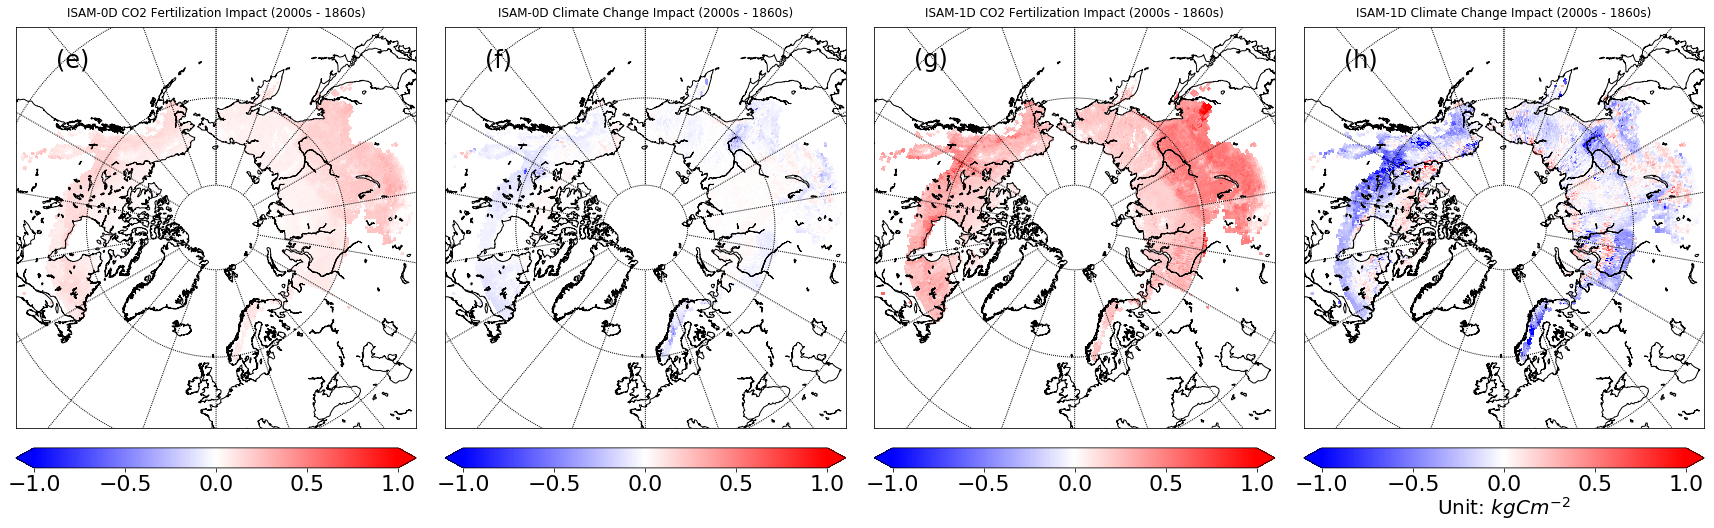

In [10]:
# Plot the figure 10b
# Topsoil
fig = plt.figure(figsize=(24,10))

ax1 = fig.add_subplot(141)
ax1.set_title("ISAM-0D CO2 Fertilization Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,dsoc0d_top_perm[:,:] - dsoc0d_top_noco2_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
cbar = map.colorbar(cs1,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(e)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax2 = fig.add_subplot(142)
ax2.set_title("ISAM-0D Climate Change Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs2 = map.pcolormesh(x,y,dsoc0d_top_perm[:,:] - dsoc0d_top_noclim_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs2,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(f)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax3 = fig.add_subplot(143)
ax3.set_title("ISAM-1D CO2 Fertilization Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs3 = map.pcolormesh(x,y, dsoc_top_perm[:,:] - dsoc_top_noco2_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
#              norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-300, vmax=300),cmap=plt.cm.coolwarm) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs3,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(g)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax4 = fig.add_subplot(144)
ax4.set_title("ISAM-1D Climate Change Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs4 = map.pcolormesh(x,y,dsoc_top_perm[:,:] - dsoc_top_noclim_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
#              norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-300, vmax=300),cmap=plt.cm.coolwarm) # use log color scale,

cbar = map.colorbar(cs4,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
cbar.ax.set_xlabel('Unit: $kgC m^{-2}$', fontsize=20, labelpad=0)
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(h)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 
plt.tight_layout()
#plt.show()
plt.savefig('./figures/fig10b.png',dpi=300)

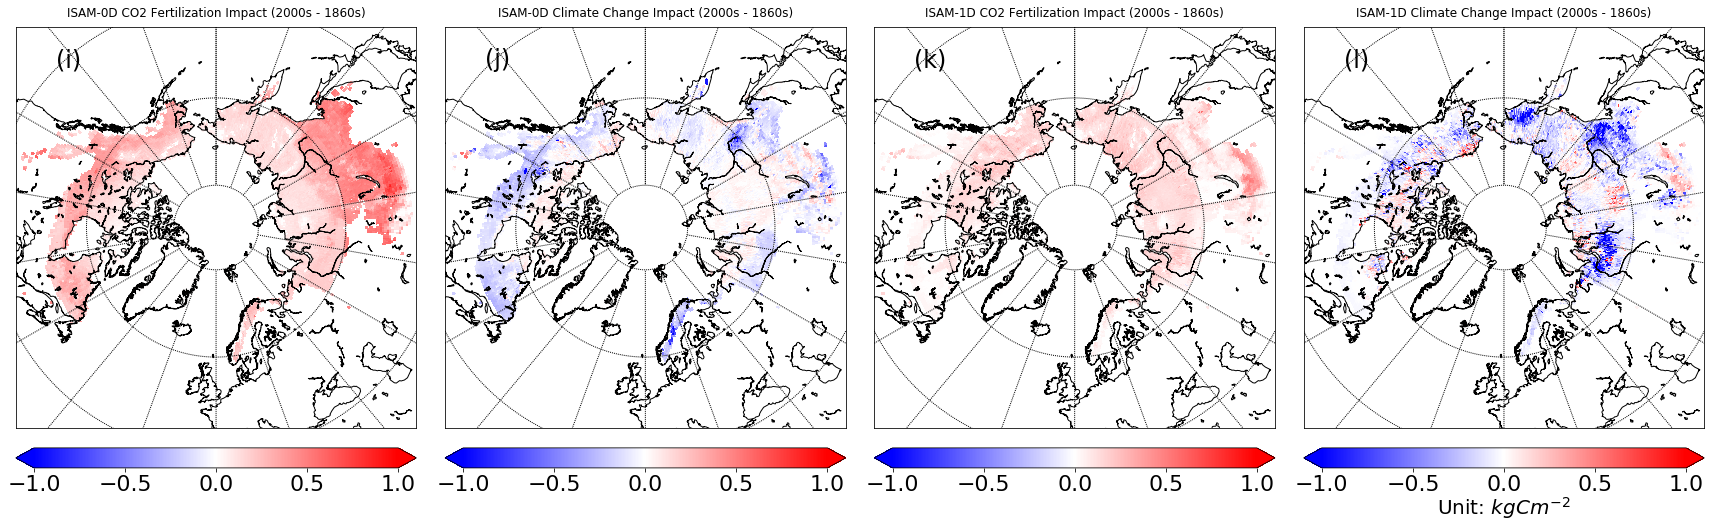

In [9]:
# Plot the figure 10c
# Subsoil
fig = plt.figure(figsize=(24,10))

ax1 = fig.add_subplot(141)
ax1.set_title("ISAM-0D CO2 Fertilization Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,dsoc0d_sub_perm[:,:] - dsoc0d_sub_noco2_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
cbar = map.colorbar(cs1,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(i)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax2 = fig.add_subplot(142)
ax2.set_title("ISAM-0D Climate Change Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs2 = map.pcolormesh(x,y,dsoc0d_sub_perm[:,:] - dsoc0d_sub_noclim_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs2,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(j)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax3 = fig.add_subplot(143)
ax3.set_title("ISAM-1D CO2 Fertilization Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs3 = map.pcolormesh(x,y, dsoc_sub_perm[:,:] - dsoc_sub_noco2_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
#              norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-300, vmax=300),cmap=plt.cm.coolwarm) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs3,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(k)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22) 

ax4 = fig.add_subplot(144)
ax4.set_title("ISAM-1D Climate Change Impact (2000s - 1860s)",fontsize=12,pad=10)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs4 = map.pcolormesh(x,y,dsoc_sub_perm[:,:] - dsoc_sub_noclim_perm[:,:],
              norm=colors.Normalize(vmin=-1.,vmax=1.),cmap=plt.cm.bwr) # use log color scale,
#              norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-300, vmax=300),cmap=plt.cm.coolwarm) # use log color scale,

cbar = map.colorbar(cs4,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
cbar.ax.set_xlabel('Unit: $kgC m^{-2}$', fontsize=20, labelpad=0)
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
plt.annotate('(l)', fontsize=24, xy=(0.1, 0.9), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=22)
plt.tight_layout()
#plt.show()
plt.savefig('./figures/fig10c.png',dpi=300)

In [ ]:
lonnc2

In [ ]:
lonnc2 % 360
